In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
import warnings
warnings.filterwarnings("ignore")

# Glass Identification

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/FlipRoboTechnologies/ML-Datasets/main/Glass%20Identification/Glass%20Identification.csv", header=None)
df

,0,1,2,3,4,5,6,7,8,9,10
0,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
1,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
2,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
3,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
4,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...
209,210,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7
210,211,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7
211,212,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7
212,213,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7


In [3]:
cols = ["Id","RI","Na","Mg","Ai","Si","K","Ca","Ba","Fe","Type_of_glass"]
df.columns = cols
print(df.columns)

Index(['Id', 'RI', 'Na', 'Mg', 'Ai', 'Si', 'K', 'Ca', 'Ba', 'Fe',
       'Type_of_glass'],
      dtype='object')


In this dataset we have to make prediction on type of glass which can be used for windows and which cannot be used for windows on basis of input variable, target variable Type_of_glass is prepared, we have total 214 number of rows and 11 number of columns one of them is target variable.

In [4]:
df.shape

(214, 11)

In [5]:
print("Total Numbers of Row",df.shape[0])
print("Total Numbers of Columns",df.shape[1])

Total Numbers of Row 214
Total Numbers of Columns 11


In [6]:
df.sample(15)

,Id,RI,Na,Mg,Ai,Si,K,Ca,Ba,Fe,Type_of_glass
109,110,1.51818,13.72,0.00,0.56,74.45,0.00,10.99,0.00,0.00,2
85,86,1.51625,13.36,3.58,1.49,72.72,0.45,8.21,0.00,0.00,2
2,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.00,1
118,119,1.51673,13.30,3.64,1.53,72.53,0.65,8.03,0.00,0.29,2
3,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.00,1
37,38,1.51797,12.74,3.48,1.35,72.96,0.64,8.68,0.00,0.00,1
4,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.00,1
97,98,1.51743,12.20,3.25,1.16,73.55,0.62,8.90,0.00,0.24,2
50,51,1.52320,13.72,3.72,0.51,71.75,0.09,10.06,0.00,0.16,1
105,106,1.52475,11.45,0.00,1.88,72.19,0.81,13.24,0.00,0.34,2


In [7]:
df.head()

,Id,RI,Na,Mg,Ai,Si,K,Ca,Ba,Fe,Type_of_glass
0,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [8]:
df.tail()

,Id,RI,Na,Mg,Ai,Si,K,Ca,Ba,Fe,Type_of_glass
209,210,1.51623,14.14,0.0,2.88,72.61,0.08,9.18,1.06,0.0,7
210,211,1.51685,14.92,0.0,1.99,73.06,0.00,8.40,1.59,0.0,7
211,212,1.52065,14.36,0.0,2.02,73.42,0.00,8.44,1.64,0.0,7
212,213,1.51651,14.38,0.0,1.94,73.61,0.00,8.48,1.57,0.0,7
213,214,1.51711,14.23,0.0,2.08,73.36,0.00,8.62,1.67,0.0,7


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             214 non-null    int64  
 1   RI             214 non-null    float64
 2   Na             214 non-null    float64
 3   Mg             214 non-null    float64
 4   Ai             214 non-null    float64
 5   Si             214 non-null    float64
 6   K              214 non-null    float64
 7   Ca             214 non-null    float64
 8   Ba             214 non-null    float64
 9   Fe             214 non-null    float64
 10  Type_of_glass  214 non-null    int64  
dtypes: float64(9), int64(2)
memory usage: 18.5 KB


In [10]:
df.isnull().sum()

Id               0
RI               0
Na               0
Mg               0
Ai               0
Si               0
K                0
Ca               0
Ba               0
Fe               0
Type_of_glass    0
dtype: int64

In [11]:
df.dtypes

Id                 int64
RI               float64
Na               float64
Mg               float64
Ai               float64
Si               float64
K                float64
Ca               float64
Ba               float64
Fe               float64
Type_of_glass      int64
dtype: object

In [12]:
df.nunique()

Id               214
RI               178
Na               142
Mg                94
Ai               118
Si               133
K                 65
Ca               143
Ba                34
Fe                32
Type_of_glass      6
dtype: int64

<Axes: >

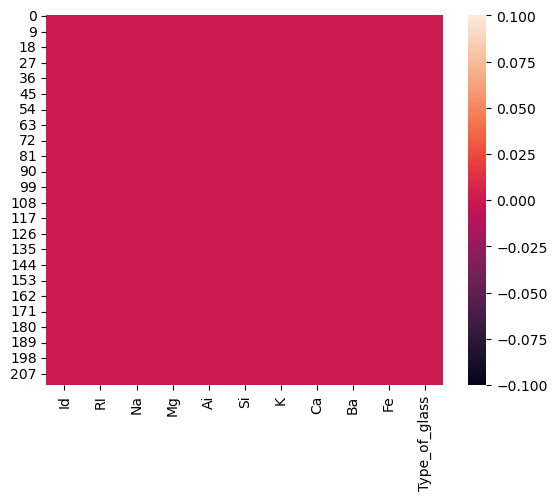

In [13]:
sns.heatmap(df.isnull())

We have checked the datatype of every columns from the dataset,
Number of unique value present in each columns,
Also checked the null or missing value are present in the dataset same is crossed checked with an heatmap.

In [14]:
df.describe()

,Id,RI,Na,Mg,Ai,Si,K,Ca,Ba,Fe,Type_of_glass
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,107.500000,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,2.780374
std,61.920648,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,2.103739
min,1.000000,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,54.250000,1.516522,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,1.000000
50%,107.500000,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,2.000000
75%,160.750000,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,3.000000
max,214.000000,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


In [15]:
df["Type_of_glass"].value_counts()

2    76
1    70
7    29
3    17
5    13
6     9
Name: Type_of_glass, dtype: int64

Id                  Axes(0.125,0.53;0.110714x0.35)
RI               Axes(0.257857,0.53;0.110714x0.35)
Na               Axes(0.390714,0.53;0.110714x0.35)
Mg               Axes(0.523571,0.53;0.110714x0.35)
Ai               Axes(0.656429,0.53;0.110714x0.35)
Si               Axes(0.789286,0.53;0.110714x0.35)
K                   Axes(0.125,0.11;0.110714x0.35)
Ca               Axes(0.257857,0.11;0.110714x0.35)
Ba               Axes(0.390714,0.11;0.110714x0.35)
Fe               Axes(0.523571,0.11;0.110714x0.35)
Type_of_glass    Axes(0.656429,0.11;0.110714x0.35)
dtype: object

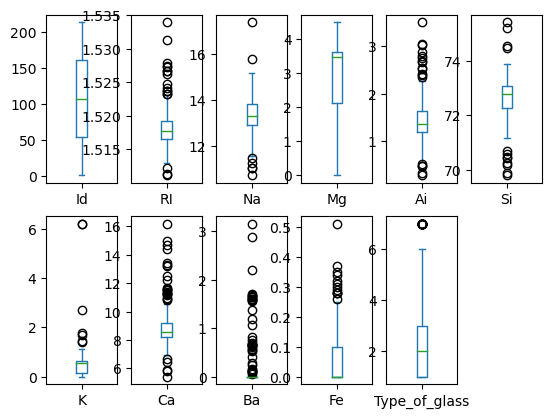

In [16]:
df.plot (kind="box", subplots=True, layout=(2,6))

<Axes: >

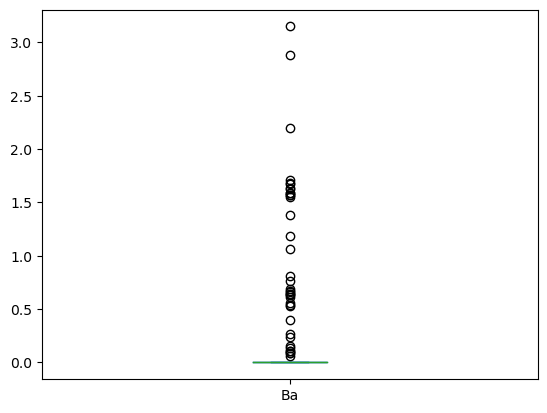

In [17]:
df['Ba'].plot.box()

<Axes: >

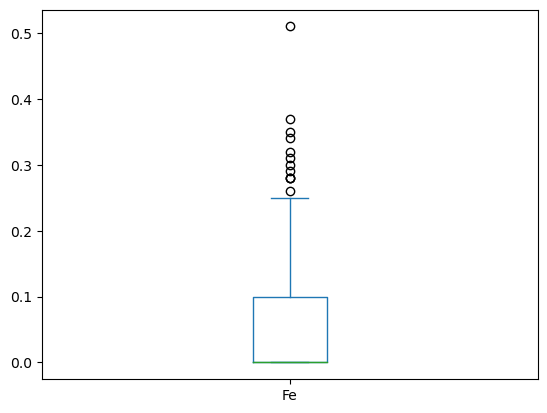

In [18]:
df["Fe"].plot.box()

<Axes: >

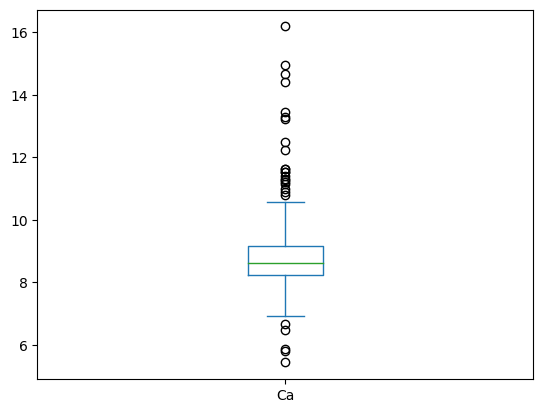

In [19]:
df["Ca"].plot.box()

Using box plot to findout the outliers in the dataset as we have very minimum outliers we are not removing the outliers,
which columns have outliers present in the data is shown with the specific box plot for that column.

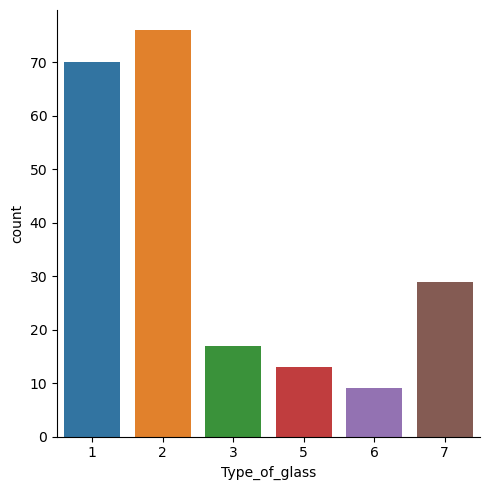

In [20]:
sns.catplot (x="Type_of_glass", data=df, kind="count")

Type of glass where which is the best quality of glass is defined with the numbers,
as we can see on above visual where 1 and 2  type of quality is more as compare to other types.

<Axes: >

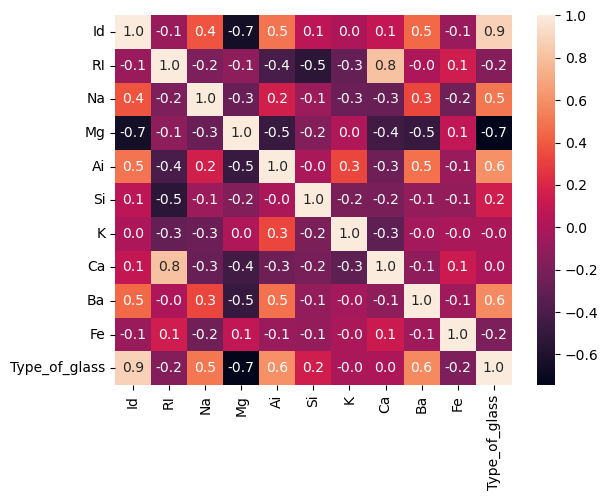

In [21]:
sns.heatmap(df.corr(), annot=True, fmt=".1f")

In [22]:
x = df.drop(["Type_of_glass","Id"], axis=1)
x

,RI,Na,Mg,Ai,Si,K,Ca,Ba,Fe
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0
...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0


In [23]:
y = df["Type_of_glass"].apply(lambda y_value: 0 if y_value>= 5 else 1)
y

0      1
1      1
2      1
3      1
4      1
      ..
209    0
210    0
211    0
212    0
213    0
Name: Type_of_glass, Length: 214, dtype: int64

Splitting the data into X and Y for training and testing.

In [24]:
from sklearn.model_selection import train_test_split
x_train , x_test , y_train , y_test = train_test_split(x , y , test_size=0.20, random_state =42)

In [25]:
x_train.shape , x_test.shape , y_train.shape , y_test.shape

((171, 9), (43, 9), (171,), (43,))

In [26]:
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(x_train , y_train)

RandomForestClassifier()

In [27]:
pred_rfc = rfc.predict(x_test)
pred_rfc

array([1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1],
      dtype=int64)

In [28]:
sc_rfc = accuracy_score(y_test , pred_rfc)
sc_rfc

0.9302325581395349

In [29]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(x_train , y_train)

LogisticRegression()

In [30]:
pred_lr = lr.predict(x_test)
pred_lr

array([1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1],
      dtype=int64)

In [31]:
sc_lr = accuracy_score(y_test , pred_lr)
sc_lr

0.9534883720930233

In [32]:
from sklearn.svm import SVC
svc = SVC()
svc.fit(x_train , y_train)

SVC()

In [33]:
pred_svc = svc.predict(x_test)
pred_svc

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
      dtype=int64)

In [34]:
sc_svc = accuracy_score(y_test , pred_svc)
sc_svc

0.6511627906976745

In [35]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
dtc.fit(x_train , y_train)

DecisionTreeClassifier()

In [36]:
pred_dtc = dtc.predict(x_test)
pred_dtc

array([1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0,
       1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1],
      dtype=int64)

In [37]:
sc_dtc = accuracy_score(y_test , pred_dtc)
sc_dtc

0.8372093023255814

In [38]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(x_train , y_train)

GaussianNB()

In [39]:
pred_gnb = gnb.predict(x_test)
pred_gnb

array([1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1],
      dtype=int64)

In [40]:
sc_gnb = accuracy_score(y_test , pred_gnb)
sc_gnb

0.9069767441860465

In [41]:
from sklearn.ensemble import ExtraTreesClassifier
etc = ExtraTreesClassifier()
etc.fit(x_train , y_train)

ExtraTreesClassifier()

In [42]:
pred_etc = etc.predict(x_test)
pred_etc

array([1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1],
      dtype=int64)

In [43]:
sc_etc = accuracy_score(y_test , pred_etc)
sc_etc

0.9767441860465116

In [44]:
print("Results from Random Forest Classifier :-",sc_rfc)
print("Results from Logistic Regression :-",sc_lr)
print("Results from SVC :-",sc_svc)
print("Results from Decision Tree Classifier :-",sc_dtc)
print("Results from GaussianNB :-",sc_gnb)
print("Results from Extra Tree Classifier :-",sc_etc)

Results from Random Forest Classifier :- 0.9302325581395349
Results from Logistic Regression :- 0.9534883720930233
Results from SVC :- 0.6511627906976745
Results from Decision Tree Classifier :- 0.8372093023255814
Results from GaussianNB :- 0.9069767441860465
Results from Extra Tree Classifier :- 0.9767441860465116


In [45]:
data = (1.52101 , 13.64 , 4.49 , 1.10 , 71.78 , 0.06 , 8.75 , 0.0 , 0.0)
data_as_np_array = np.asarray(data)
data_reshaped = data_as_np_array.reshape(1,-1)
prediction = etc.predict(data_reshaped)
print(prediction)

[1]


In [46]:
if (prediction[0]==1):
    print("Window Glass")
else:
    print("Non Window Glass")

Window Glass


We have used classification models to identify the best Type of glass, 
from wher we have received the best result using the Extra Tree Classifier which is 0.9767441860465116
and the second best result we have got from Random Forest Classifier of 0.9302325581395349, 
We have created the prediction model using Extra Tree Classifier only which is predicting the Glass can be used or cannot be used for windows on the basis of type of glass.

# Student grades prediction

In [47]:
df = pd.read_csv("https://raw.githubusercontent.com/FlipRoboTechnologies/ML-Datasets/main/Grades/Grades.csv")
df

,Seat No.,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,...,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412,CGPA
0,CS-97001,B-,D+,C-,C,C-,D+,D,C-,B-,...,C-,C-,C-,C-,A-,A,C-,B,A-,2.205
1,CS-97002,A,D,D+,D,B-,C,D,A,D+,...,D+,D,C,D,A-,B-,C,C,B,2.008
2,CS-97003,A,B,A,B-,B+,A,B-,B+,A-,...,B,B,A,C,A,A,A,A-,A,3.608
3,CS-97004,D,C+,D+,D,D,A-,D+,C-,D,...,D+,C,D+,C-,B-,B,C+,C+,C+,1.906
4,CS-97005,A-,A-,A-,B+,A,A,A-,B+,A,...,B-,B+,B+,B-,A-,A,A-,A-,A,3.448
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
566,CS-97567,B,A,A,A-,A+,A,A-,A-,A+,...,A-,A-,A,A,A,B+,B+,B,A,3.798
567,CS-97568,A+,A,A,A,A,A,A,A-,A,...,B+,B+,A,A,A-,B,A-,C,A-,3.772
568,CS-97569,B,A,A-,B+,A,A,A,A,A,...,A-,B,A,B+,A,C,B+,A-,A-,3.470
569,CS-97570,A,B+,D,A,D,D+,B-,C-,B-,...,D,B,B,C-,D,C,B,B-,C,2.193


In the Dataset we have result given in grades of four years, In total we have 571 rows where seat number and grades of four years with the CGPA, And 43 columns where subject and years are mentioned,
We have to create the model on the basis of grades model should be predicting the CGPA of attendee.

In [48]:
df.isnull().sum()

Seat No.      0
PH-121        0
HS-101        0
CY-105        1
HS-105/12     1
MT-111        2
CS-105        0
CS-106        2
EL-102        2
EE-119        2
ME-107        2
CS-107        2
HS-205/20     5
MT-222        5
EE-222        7
MT-224        7
CS-210        7
CS-211        5
CS-203        5
CS-214        6
EE-217        6
CS-212        6
CS-215        6
MT-331        9
EF-303       10
HS-304       10
CS-301       10
CS-302       10
TC-383       10
MT-442       10
EL-332        9
CS-318        9
CS-306        9
CS-312       10
CS-317       12
CS-403       12
CS-421       12
CS-406       85
CS-414       13
CS-419       13
CS-423       14
CS-412       79
CGPA          0
dtype: int64

As we can check we have many null values present in the dataset every columns have some missing value present.

In [49]:
df.shape
print("Number of Rows =",df.shape[0])
print("Number of Columns =",df.shape[1])

Number of Rows = 571
Number of Columns = 43


In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 571 entries, 0 to 570
Data columns (total 43 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Seat No.   571 non-null    object 
 1   PH-121     571 non-null    object 
 2   HS-101     571 non-null    object 
 3   CY-105     570 non-null    object 
 4   HS-105/12  570 non-null    object 
 5   MT-111     569 non-null    object 
 6   CS-105     571 non-null    object 
 7   CS-106     569 non-null    object 
 8   EL-102     569 non-null    object 
 9   EE-119     569 non-null    object 
 10  ME-107     569 non-null    object 
 11  CS-107     569 non-null    object 
 12  HS-205/20  566 non-null    object 
 13  MT-222     566 non-null    object 
 14  EE-222     564 non-null    object 
 15  MT-224     564 non-null    object 
 16  CS-210     564 non-null    object 
 17  CS-211     566 non-null    object 
 18  CS-203     566 non-null    object 
 19  CS-214     565 non-null    object 
 20  EE-217    

In [51]:
df.nunique()

Seat No.     571
PH-121        13
HS-101        12
CY-105        13
HS-105/12     13
MT-111        13
CS-105        11
CS-106        13
EL-102        13
EE-119        12
ME-107        13
CS-107        14
HS-205/20     13
MT-222        14
EE-222        13
MT-224        14
CS-210        14
CS-211        14
CS-203        13
CS-214        13
EE-217        13
CS-212        12
CS-215        14
MT-331        12
EF-303        12
HS-304        14
CS-301        12
CS-302        11
TC-383        12
MT-442        12
EL-332        13
CS-318        14
CS-306        13
CS-312        14
CS-317        12
CS-403        11
CS-421        13
CS-406        14
CS-414        13
CS-419        12
CS-423        12
CS-412        13
CGPA         491
dtype: int64

In [52]:
df.columns

Index(['Seat No.', 'PH-121', 'HS-101', 'CY-105', 'HS-105/12', 'MT-111',
       'CS-105', 'CS-106', 'EL-102', 'EE-119', 'ME-107', 'CS-107', 'HS-205/20',
       'MT-222', 'EE-222', 'MT-224', 'CS-210', 'CS-211', 'CS-203', 'CS-214',
       'EE-217', 'CS-212', 'CS-215', 'MT-331', 'EF-303', 'HS-304', 'CS-301',
       'CS-302', 'TC-383', 'MT-442', 'EL-332', 'CS-318', 'CS-306', 'CS-312',
       'CS-317', 'CS-403', 'CS-421', 'CS-406', 'CS-414', 'CS-419', 'CS-423',
       'CS-412', 'CGPA'],
      dtype='object')

In [53]:
df.head()

,Seat No.,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,...,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412,CGPA
0,CS-97001,B-,D+,C-,C,C-,D+,D,C-,B-,...,C-,C-,C-,C-,A-,A,C-,B,A-,2.205
1,CS-97002,A,D,D+,D,B-,C,D,A,D+,...,D+,D,C,D,A-,B-,C,C,B,2.008
2,CS-97003,A,B,A,B-,B+,A,B-,B+,A-,...,B,B,A,C,A,A,A,A-,A,3.608
3,CS-97004,D,C+,D+,D,D,A-,D+,C-,D,...,D+,C,D+,C-,B-,B,C+,C+,C+,1.906
4,CS-97005,A-,A-,A-,B+,A,A,A-,B+,A,...,B-,B+,B+,B-,A-,A,A-,A-,A,3.448


As we have data present in the object format, will need to convert the datatype in to integer or float,
We have used Ordinal Encoder to encode the data present in each columns.

In [56]:
from sklearn.preprocessing import OrdinalEncoder
oe = OrdinalEncoder()

In [57]:
encode = oe.fit_transform(df[['PH-121', 'HS-101', 'CY-105', 'HS-105/12', 'MT-111',
                              'CS-105', 'CS-106', 'EL-102', 'EE-119', 'ME-107', 'CS-107', 'HS-205/20',
                              'MT-222', 'EE-222', 'MT-224', 'CS-210', 'CS-211', 'CS-203', 'CS-214',
                              'EE-217', 'CS-212', 'CS-215', 'MT-331', 'EF-303', 'HS-304', 'CS-301',
                              'CS-302', 'TC-383', 'MT-442', 'EL-332', 'CS-318', 'CS-306', 'CS-312',
                              'CS-317', 'CS-403', 'CS-421', 'CS-406', 'CS-414', 'CS-419', 'CS-423','CS-412']])

In [58]:
df[['PH-121', 'HS-101', 'CY-105', 'HS-105/12', 'MT-111',
    'CS-105', 'CS-106', 'EL-102', 'EE-119', 'ME-107', 'CS-107', 'HS-205/20',
    'MT-222', 'EE-222', 'MT-224', 'CS-210', 'CS-211', 'CS-203', 'CS-214',
    'EE-217', 'CS-212', 'CS-215', 'MT-331', 'EF-303', 'HS-304', 'CS-301',
    'CS-302', 'TC-383', 'MT-442', 'EL-332', 'CS-318', 'CS-306', 'CS-312',
    'CS-317', 'CS-403', 'CS-421', 'CS-406', 'CS-414', 'CS-419', 'CS-423','CS-412']]= encode

we have encode the columns to proceed further also checked the data using sample where we can can see clearly data.

In [59]:
df.sample(10)

,Seat No.,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,...,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412,CGPA
260,CS-97261,0.0,2.0,0.0,1.0,0.0,1.0,0.0,2.0,2.0,...,2.0,0.0,1.0,2.0,2.0,0.0,2.0,0.0,0.0,3.751
301,CS-97302,3.0,4.0,1.0,4.0,0.0,0.0,3.0,1.0,0.0,...,0.0,3.0,0.0,2.0,NaN,0.0,2.0,4.0,4.0,3.656
439,CS-97440,4.0,7.0,0.0,2.0,4.0,2.0,5.0,2.0,2.0,...,3.0,6.0,0.0,10.0,5.0,5.0,3.0,6.0,5.0,3.019
228,CS-97229,5.0,5.0,5.0,4.0,6.0,5.0,3.0,6.0,7.0,...,6.0,5.0,0.0,3.0,2.0,2.0,2.0,2.0,2.0,2.895
429,CS-97430,2.0,3.0,0.0,2.0,2.0,2.0,3.0,3.0,4.0,...,3.0,6.0,3.0,5.0,6.0,7.0,4.0,3.0,6.0,2.917
514,CS-97515,3.0,9.0,4.0,2.0,5.0,4.0,3.0,9.0,4.0,...,0.0,3.0,0.0,2.0,2.0,3.0,0.0,4.0,4.0,3.027
168,CS-97169,0.0,7.0,2.0,1.0,7.0,2.0,3.0,6.0,4.0,...,8.0,5.0,2.0,3.0,2.0,0.0,5.0,5.0,0.0,2.982
485,CS-97486,3.0,3.0,2.0,4.0,2.0,2.0,0.0,9.0,4.0,...,4.0,6.0,2.0,5.0,3.0,7.0,3.0,5.0,7.0,3.303
157,CS-97158,2.0,5.0,2.0,0.0,5.0,0.0,3.0,4.0,3.0,...,8.0,5.0,7.0,7.0,2.0,2.0,5.0,6.0,2.0,3.182
169,CS-97170,4.0,2.0,2.0,2.0,2.0,2.0,5.0,4.0,5.0,...,3.0,3.0,4.0,8.0,2.0,2.0,2.0,3.0,4.0,3.246


In [60]:
df.describe()

,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,ME-107,...,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412,CGPA
count,571.000000,571.000000,570.000000,570.000000,569.000000,571.000000,569.000000,569.000000,569.000000,569.000000,...,561.000000,559.000000,559.000000,559.000000,486.000000,558.000000,558.000000,557.000000,492.000000,571.000000
mean,3.781086,5.071804,2.903509,4.249123,3.903339,2.838879,4.130053,3.966608,3.892794,4.789104,...,4.126560,4.831843,3.506261,5.436494,3.156379,2.453405,3.899642,4.016158,3.217480,2.954888
std,3.046895,2.785317,2.964848,3.198370,2.991680,2.696709,2.729074,3.034533,2.659841,3.147403,...,3.366859,2.769584,2.969296,2.735501,2.638383,2.501091,2.393281,2.812758,2.471726,0.620552
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.800000
25%,2.000000,3.000000,0.000000,2.000000,2.000000,0.000000,2.000000,2.000000,2.000000,2.000000,...,1.000000,3.000000,1.000000,3.000000,2.000000,0.000000,2.000000,2.000000,2.000000,2.538000
50%,3.000000,5.000000,2.000000,4.000000,4.000000,2.000000,4.000000,3.000000,3.000000,5.000000,...,4.000000,5.000000,3.000000,5.000000,2.000000,2.000000,4.000000,4.000000,3.000000,3.029000
75%,6.000000,7.000000,4.750000,7.000000,6.000000,4.000000,5.000000,6.000000,6.000000,8.000000,...,7.000000,7.000000,5.000000,7.000000,4.000000,4.000000,5.000000,6.000000,4.000000,3.451000
max,12.000000,11.000000,12.000000,12.000000,12.000000,10.000000,12.000000,12.000000,11.000000,12.000000,...,13.000000,11.000000,10.000000,12.000000,13.000000,12.000000,11.000000,11.000000,12.000000,3.985000


In [61]:
df.isnull().sum()

Seat No.      0
PH-121        0
HS-101        0
CY-105        1
HS-105/12     1
MT-111        2
CS-105        0
CS-106        2
EL-102        2
EE-119        2
ME-107        2
CS-107        2
HS-205/20     5
MT-222        5
EE-222        7
MT-224        7
CS-210        7
CS-211        5
CS-203        5
CS-214        6
EE-217        6
CS-212        6
CS-215        6
MT-331        9
EF-303       10
HS-304       10
CS-301       10
CS-302       10
TC-383       10
MT-442       10
EL-332        9
CS-318        9
CS-306        9
CS-312       10
CS-317       12
CS-403       12
CS-421       12
CS-406       85
CS-414       13
CS-419       13
CS-423       14
CS-412       79
CGPA          0
dtype: int64

As we have encoded the data for further analysis but we had missing values present in the data, So we will fill out the missing values in the dataset,
We have filled the columns with the mean values of there columns.

In [62]:
df["CS-412"].fillna(df["CS-412"].mean(), inplace=True)
df["CS-423"].fillna(df["CS-423"].mean(), inplace=True)
df["CS-419"].fillna(df["CS-419"].mean(), inplace=True)
df["CS-414"].fillna(df["CS-414"].mean(), inplace=True)
df["CS-406"].fillna(df["CS-406"].mean(), inplace=True)
df["CS-421"].fillna(df["CS-421"].mean(), inplace=True)
df["CS-403"].fillna(df["CS-403"].mean(), inplace=True)
df["CS-317"].fillna(df["CS-317"].mean(), inplace=True)
df["CS-312"].fillna(df["CS-312"].mean(), inplace=True)
df["CS-306"].fillna(df["CS-306"].mean(), inplace=True)
df["CS-318"].fillna(df["CS-318"].mean(), inplace=True)
df["EL-332"].fillna(df["EL-332"].mean(), inplace=True)
df["MT-442"].fillna(df["MT-442"].mean(), inplace=True)
df["TC-383"].fillna(df["TC-383"].mean(), inplace=True)
df["CS-302"].fillna(df["CS-302"].mean(), inplace=True)
df["CS-301"].fillna(df["CS-301"].mean(), inplace=True)
df["HS-304"].fillna(df["HS-304"].mean(), inplace=True)
df["EF-303"].fillna(df["EF-303"].mean(), inplace=True)
df["MT-331"].fillna(df["MT-331"].mean(), inplace=True)
df["CS-215"].fillna(df["CS-215"].mean(), inplace=True)
df["CS-212"].fillna(df["CS-212"].mean(), inplace=True)
df["EE-217"].fillna(df["EE-217"].mean(), inplace=True)
df["CS-214"].fillna(df["CS-214"].mean(), inplace=True)
df["CS-203"].fillna(df["CS-203"].mean(), inplace=True)
df["CS-211"].fillna(df["CS-211"].mean(), inplace=True)
df['CS-210'].fillna(df["CS-210"].mean(), inplace=True)
df["MT-224"].fillna(df["MT-224"].mean(), inplace=True)
df["EE-222"].fillna(df["EE-222"].mean(), inplace=True)
df["MT-222"].fillna(df["MT-222"].mean(), inplace=True)
df["HS-205/20"].fillna(df['HS-205/20'].mean(), inplace=True)
df["CS-107"].fillna(df["CS-107"].mean(), inplace=True)
df["ME-107"].fillna(df["ME-107"].mean(), inplace=True)
df["EE-119"].fillna(df["EE-119"].mean(), inplace=True)
df["EL-102"].fillna(df["EL-102"].mean(), inplace=True)
df["CS-106"].fillna(df["CS-106"].mean(), inplace=True)
df["MT-111"].fillna(df["MT-111"].mean(), inplace=True)
df["HS-105/12"].fillna(df["HS-105/12"].mean(), inplace=True)
df["CY-105"].fillna(df["CY-105"].mean(), inplace=True)

In [63]:
df.isnull().sum()

Seat No.     0
PH-121       0
HS-101       0
CY-105       0
HS-105/12    0
MT-111       0
CS-105       0
CS-106       0
EL-102       0
EE-119       0
ME-107       0
CS-107       0
HS-205/20    0
MT-222       0
EE-222       0
MT-224       0
CS-210       0
CS-211       0
CS-203       0
CS-214       0
EE-217       0
CS-212       0
CS-215       0
MT-331       0
EF-303       0
HS-304       0
CS-301       0
CS-302       0
TC-383       0
MT-442       0
EL-332       0
CS-318       0
CS-306       0
CS-312       0
CS-317       0
CS-403       0
CS-421       0
CS-406       0
CS-414       0
CS-419       0
CS-423       0
CS-412       0
CGPA         0
dtype: int64

Checked if there is any null values still present in the data, also checked with the heatmap.

<Axes: >

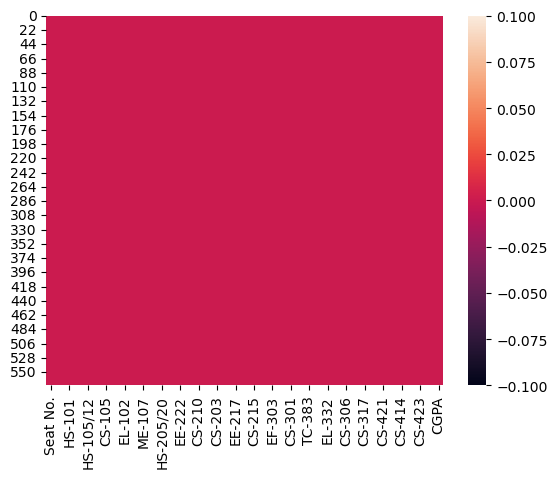

In [64]:
sns.heatmap(df.isnull())

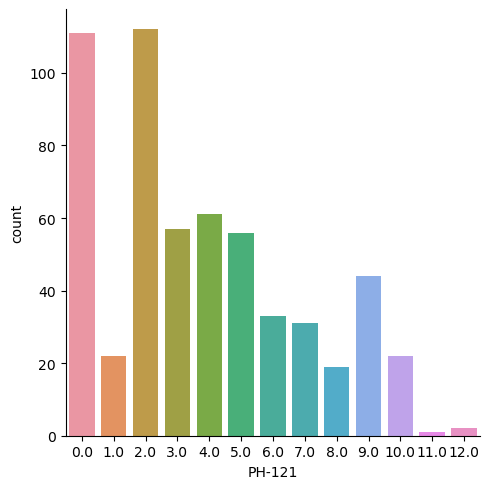

In [65]:
sns.catplot (x="PH-121", data=df, kind="count")

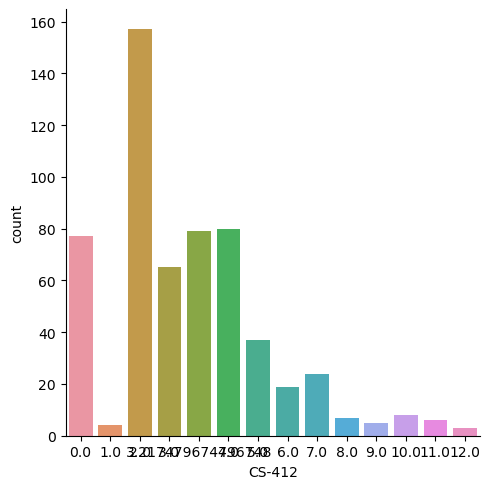

In [66]:
sns.catplot (x="CS-412", data=df, kind="count")

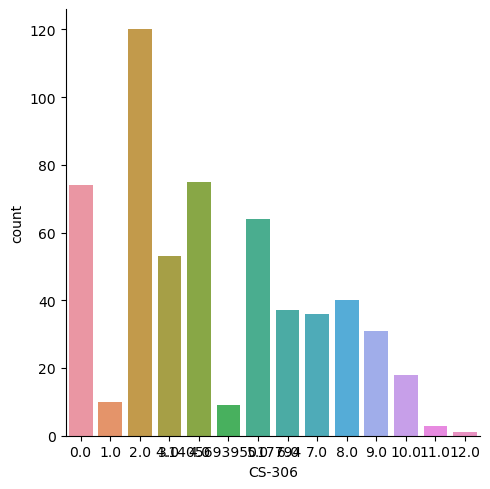

In [67]:
sns.catplot (x ="CS-306" , data=df, kind="count")

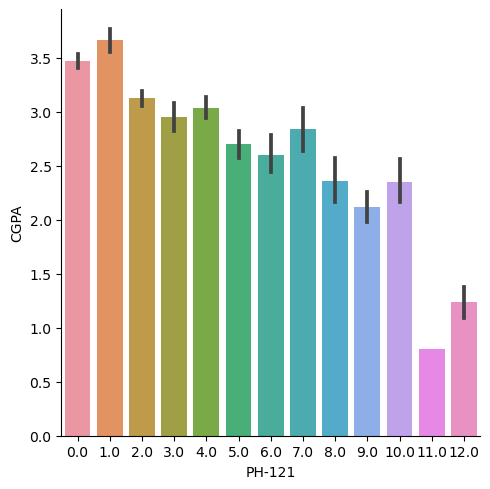

In [68]:
sns.catplot (x="PH-121", y="CGPA", data=df, kind="bar")

Here we have compared the target variable with the column PH-121 of the dataset.

PH-121          Axes(0.125,0.786098;0.0945122x0.0939024)
HS-101       Axes(0.238415,0.786098;0.0945122x0.0939024)
CY-105       Axes(0.351829,0.786098;0.0945122x0.0939024)
HS-105/12    Axes(0.465244,0.786098;0.0945122x0.0939024)
MT-111       Axes(0.578659,0.786098;0.0945122x0.0939024)
CS-105       Axes(0.692073,0.786098;0.0945122x0.0939024)
CS-106       Axes(0.805488,0.786098;0.0945122x0.0939024)
EL-102          Axes(0.125,0.673415;0.0945122x0.0939024)
EE-119       Axes(0.238415,0.673415;0.0945122x0.0939024)
ME-107       Axes(0.351829,0.673415;0.0945122x0.0939024)
CS-107       Axes(0.465244,0.673415;0.0945122x0.0939024)
HS-205/20    Axes(0.578659,0.673415;0.0945122x0.0939024)
MT-222       Axes(0.692073,0.673415;0.0945122x0.0939024)
EE-222       Axes(0.805488,0.673415;0.0945122x0.0939024)
MT-224          Axes(0.125,0.560732;0.0945122x0.0939024)
CS-210       Axes(0.238415,0.560732;0.0945122x0.0939024)
CS-211       Axes(0.351829,0.560732;0.0945122x0.0939024)
CS-203       Axes(0.465244,0.56

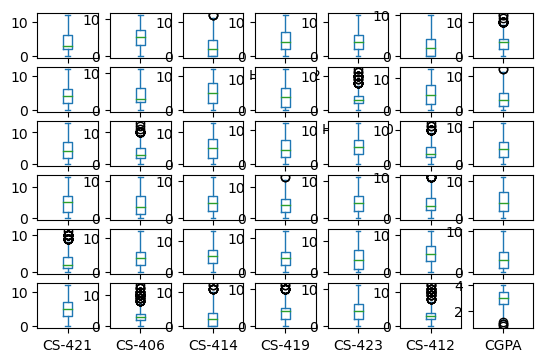

In [69]:
df.plot(kind="box", subplots=True, layout=(7,7))

In [70]:
x = df.drop(["CGPA","Seat No."], axis=1)
x

,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,ME-107,...,CS-306,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412
0,5.0,10.0,8.0,6.0,8.0,10.0,9.0,8.0,5.0,8.0,...,6.0,8.0,8.0,8.0,8.0,2.0,0.0,8.0,3.0,2.0
1,0.0,9.0,10.0,9.0,5.0,6.0,9.0,0.0,10.0,9.0,...,9.0,10.0,9.0,6.0,9.0,2.0,5.0,6.0,6.0,3.0
2,0.0,3.0,0.0,5.0,4.0,0.0,5.0,4.0,2.0,2.0,...,2.0,3.0,3.0,0.0,6.0,0.0,0.0,0.0,2.0,0.0
3,9.0,7.0,10.0,9.0,9.0,2.0,10.0,8.0,9.0,7.0,...,8.0,10.0,6.0,10.0,8.0,5.0,3.0,7.0,7.0,7.0
4,2.0,2.0,2.0,4.0,0.0,0.0,2.0,4.0,0.0,2.0,...,2.0,5.0,4.0,4.0,5.0,2.0,0.0,2.0,2.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
566,3.0,0.0,0.0,2.0,1.0,0.0,2.0,2.0,1.0,4.0,...,4.0,2.0,2.0,0.0,0.0,0.0,4.0,4.0,3.0,0.0
567,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,...,2.0,4.0,4.0,0.0,0.0,2.0,3.0,2.0,6.0,2.0
568,3.0,0.0,2.0,4.0,0.0,0.0,0.0,0.0,0.0,3.0,...,4.0,2.0,3.0,0.0,4.0,0.0,6.0,4.0,2.0,2.0
569,0.0,4.0,9.0,0.0,9.0,10.0,5.0,8.0,5.0,8.0,...,4.0,9.0,3.0,3.0,8.0,9.0,6.0,3.0,5.0,6.0


In [71]:
y = df["CGPA"]
y

0      2.205
1      2.008
2      3.608
3      1.906
4      3.448
       ...  
566    3.798
567    3.772
568    3.470
569    2.193
570    1.753
Name: CGPA, Length: 571, dtype: float64

Splitting the data into X and Y for traning and testing.

In [72]:
from sklearn.model_selection import train_test_split
x_train , x_test , y_train , y_test = train_test_split(x , y , test_size=0.2, random_state=42)

In [73]:
x_train.shape , x_test.shape , y_train.shape , y_test.shape

((456, 41), (115, 41), (456,), (115,))

In [74]:
from sklearn import metrics
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(x_train, y_train)
pred_lr = lr.predict(x_test)
pred_lr

array([2.06647758, 3.53628894, 2.79642328, 2.24416229, 3.92058156,
       3.46347785, 2.49165317, 2.30495623, 2.18707614, 2.9863822 ,
       3.55897302, 2.90792788, 3.62897257, 2.5529509 , 3.95540682,
       2.69230296, 2.15961377, 3.64646413, 1.62811094, 2.38472322,
       2.4090532 , 3.86581206, 2.20012165, 2.41691183, 2.86537713,
       3.25434971, 3.13099122, 2.48121848, 3.34438973, 3.43064668,
       2.85682413, 2.64859476, 3.42977699, 3.29628242, 3.73651197,
       2.98037949, 2.63245379, 3.93809504, 2.89448721, 1.91899501,
       3.78128097, 3.44336815, 3.76824704, 3.77767334, 3.24151678,
       2.1686811 , 2.63893879, 3.15456183, 3.21192793, 3.79185413,
       3.01171483, 3.51632797, 3.32459168, 3.65185024, 3.43617283,
       2.98454944, 3.95207886, 3.78148832, 3.66258175, 2.54177891,
       3.74688679, 3.65823074, 3.80506497, 3.44995788, 3.39335877,
       3.00647314, 3.33408319, 3.20424546, 2.83719957, 2.2841892 ,
       3.6146185 , 3.27618296, 2.51075591, 3.7597728 , 3.87393

In [75]:
sc_lr = metrics.r2_score(y_test, pred_lr)
sc_lr

0.9825237128859494

In [76]:
from sklearn.svm import SVR
svm = SVR()
svm.fit(x_train, y_train)
pred_svm = svm.predict(x_test)
pred_svm

array([2.040639  , 3.60983524, 2.79099115, 2.13863785, 3.73138069,
       3.47479371, 2.56063525, 2.24896486, 2.26864446, 2.92267303,
       3.42080127, 2.91794585, 3.62645574, 2.56793381, 3.7808371 ,
       2.65470754, 2.1559911 , 3.59774265, 1.93543588, 2.30432339,
       2.34001941, 3.87115716, 2.34684212, 2.48421593, 2.84694558,
       3.41273426, 3.25438495, 2.35523376, 3.32156666, 3.41641439,
       2.73893967, 2.70315951, 3.60157618, 3.4227934 , 3.64889835,
       2.93288487, 2.72791417, 3.86009225, 2.82891905, 2.01346652,
       3.51617608, 3.48178191, 3.74829038, 3.7332306 , 3.33066018,
       2.21470166, 2.60005648, 3.20472347, 3.23999108, 3.72476143,
       3.08238482, 3.5209534 , 3.2126502 , 3.73571099, 3.51914516,
       3.02880954, 3.81512203, 3.67006648, 3.64036126, 2.58242916,
       3.69159731, 3.59049248, 3.76638501, 3.51986969, 3.4388749 ,
       3.05515925, 3.26335132, 3.2034913 , 2.86065743, 2.30550323,
       3.60496969, 3.208906  , 2.48357003, 3.71402243, 3.78943

In [77]:
sc_svm = metrics.r2_score(y_test,pred_svm)
sc_svm

0.9652966776852157

In [78]:
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor()
rfr.fit(x_train, y_train)
pred_rfr = rfr.predict(x_test)
pred_rfr

array([2.08049, 3.4975 , 2.70747, 2.24929, 3.80979, 3.4356 , 2.5831 ,
       2.38283, 2.27343, 2.91349, 3.4799 , 2.96076, 3.69377, 2.52877,
       3.87991, 2.61955, 2.16963, 3.5881 , 2.08351, 2.41054, 2.19742,
       3.80809, 2.57043, 2.61736, 2.80342, 3.35052, 3.22076, 2.40668,
       3.30861, 3.4006 , 2.47496, 2.76217, 3.34309, 3.28877, 3.59171,
       3.11597, 2.65319, 3.85139, 2.82805, 2.02798, 3.71504, 3.39793,
       3.76657, 3.64251, 3.29512, 2.48768, 2.71365, 3.18282, 3.20454,
       3.77489, 3.37978, 3.43892, 3.3631 , 3.56421, 3.27785, 3.23873,
       3.6908 , 3.68797, 3.66013, 2.62461, 3.68749, 3.56479, 3.80544,
       3.4797 , 3.37666, 3.01026, 3.44373, 3.15028, 2.93733, 2.35048,
       3.69281, 3.28571, 2.50274, 3.73879, 3.84201, 3.3422 , 3.449  ,
       2.18693, 3.71355, 3.02458, 2.53791, 2.82949, 1.80942, 2.67291,
       3.71799, 3.78717, 3.25268, 2.9007 , 2.64159, 2.18499, 2.98271,
       3.12458, 2.69312, 2.744  , 2.08385, 3.67542, 3.75639, 3.05456,
       2.93627, 2.89

In [79]:
sc_rfr = metrics.r2_score(y_test,pred_rfr)
sc_rfr

0.9600386624354587

In [80]:
from sklearn.ensemble import GradientBoostingRegressor
gbr = GradientBoostingRegressor()
gbr.fit(x_train, y_train)
pred_gbr = gbr.predict(x_test)
pred_gbr

array([2.16166836, 3.51216483, 2.75412931, 2.21370595, 3.80138702,
       3.46088859, 2.6623983 , 2.36016669, 2.37229429, 2.99012039,
       3.45986189, 2.97593221, 3.67966203, 2.51620932, 3.85224429,
       2.66805661, 2.10857583, 3.61683423, 1.9118371 , 2.37172078,
       2.18851313, 3.81275485, 2.35916874, 2.52943953, 2.90027957,
       3.32967924, 3.12151075, 2.30968912, 3.34618929, 3.36840959,
       2.46355187, 2.74700238, 3.38755797, 3.29524758, 3.50001029,
       3.02399557, 2.58350947, 3.87857307, 2.98354068, 1.9105062 ,
       3.74660873, 3.48809295, 3.69337326, 3.67832147, 3.26125897,
       2.53230579, 2.840779  , 3.16058506, 3.08996106, 3.7793914 ,
       3.42391412, 3.4328324 , 3.34263622, 3.61594253, 3.14882211,
       3.24138385, 3.7641645 , 3.72303886, 3.75414778, 2.71916527,
       3.74084824, 3.58839976, 3.82711632, 3.47292595, 3.34288088,
       3.060197  , 3.40769523, 3.15156509, 2.94289536, 2.31664838,
       3.6787527 , 3.21308313, 2.51649673, 3.84301619, 3.87007

In [81]:
sc_gbr = metrics.r2_score(y_test,pred_gbr)
sc_gbr

0.9681070981769451

In [82]:
from sklearn.tree import DecisionTreeRegressor
dtc=DecisionTreeRegressor()
dtc.fit(x_train , y_train)
pred_dtc = dtc.predict(x_test)
pred_dtc

array([1.882, 3.483, 3.03 , 2.087, 3.919, 3.35 , 2.895, 2.165, 2.384,
       2.822, 3.648, 2.995, 3.798, 2.488, 3.897, 2.773, 2.264, 3.366,
       2.084, 2.414, 2.205, 3.631, 3.058, 2.35 , 3.03 , 3.513, 3.432,
       2.321, 3.432, 3.483, 2.188, 2.821, 3.253, 3.335, 3.5  , 3.023,
       2.57 , 3.725, 2.822, 1.906, 3.755, 3.416, 3.696, 3.714, 3.076,
       2.379, 2.918, 3.303, 3.176, 3.725, 3.425, 3.258, 3.451, 3.727,
       3.219, 2.922, 3.751, 3.714, 3.662, 2.146, 3.176, 3.624, 3.876,
       3.559, 3.597, 2.935, 3.483, 3.258, 3.207, 2.347, 3.737, 3.848,
       2.845, 3.756, 3.576, 3.481, 3.425, 2.396, 3.751, 2.995, 2.57 ,
       3.019, 1.708, 2.777, 3.694, 3.798, 3.112, 3.033, 2.793, 1.714,
       3.09 , 3.136, 2.489, 2.941, 2.028, 3.714, 3.332, 2.917, 3.106,
       2.75 , 3.253, 3.258, 3.023, 2.918, 2.918, 3.528, 2.785, 2.347,
       2.773, 2.717, 2.88 , 3.111, 3.672, 3.425, 2.698])

In [83]:
sc_dtc = metrics.r2_score(y_test, pred_dtc)
sc_dtc

0.8697942756052689

In [84]:
print("Results from Linear Regression :-",sc_lr)
print("Results from SVR :-",sc_svm)
print("Results from Random Forest Regressor :-",sc_rfr)
print("Results from Gradient Boosting Regressor :-", sc_gbr)
print("Results from Decision Tree Regressor :-", sc_dtc)

Results from Linear Regression :- 0.9825237128859494
Results from SVR :- 0.9652966776852157
Results from Random Forest Regressor :- 0.9600386624354587
Results from Gradient Boosting Regressor :- 0.9681070981769451
Results from Decision Tree Regressor :- 0.8697942756052689


In [87]:
pd.set_option('display.max_columns', None)

In [91]:
print(x.head())

   PH-121  HS-101  CY-105  HS-105/12  MT-111  CS-105  CS-106  EL-102  EE-119  \
0     5.0    10.0     8.0        6.0     8.0    10.0     9.0     8.0     5.0   
1     0.0     9.0    10.0        9.0     5.0     6.0     9.0     0.0    10.0   
2     0.0     3.0     0.0        5.0     4.0     0.0     5.0     4.0     2.0   
3     9.0     7.0    10.0        9.0     9.0     2.0    10.0     8.0     9.0   
4     2.0     2.0     2.0        4.0     0.0     0.0     2.0     4.0     0.0   

   ME-107  CS-107  HS-205/20  MT-222  EE-222  MT-224  CS-210  CS-211  CS-203  \
0     8.0     8.0        4.0     9.0     2.0     5.0     7.0    10.0    10.0   
1     9.0     4.0        7.0     5.0     8.0    10.0    10.0     9.0     6.0   
2     2.0     5.0        2.0     0.0     0.0     0.0     0.0     1.0     0.0   
3     7.0     9.0        3.0    10.0     5.0     9.0     6.0     4.0     7.0   
4     2.0     6.0        0.0     0.0     2.0     2.0     2.0     5.0     0.0   

   CS-214  EE-217  CS-212  CS-215  MT-

In [90]:
data = (5.0,10.0,8.0,6.0,8.0,10.0,9.0,8.0,5.0,
        8.0,8.0,4.0,9.0,2.0,5.0,7.0,10.0,10.0,
        9.0,0.0,9.0,8.0,6.0,7.0,7.0,3.0,6.0,
        7.0,4.0,6.0,8.0,6.0,8.0,8.0,8.0,8.0,
        2.0,0.0,8.0,3.0,2.0)

data_as_np_array = np.asarray(data)
data_reshaped = data_as_np_array.reshape(1,-1)
prediction = lr.predict(data_reshaped)
print("CGPA is :-",prediction)

CGPA is :- [2.17538442]


We have created model to predict CGPA from the given data,
Have used many regression model to predict the output we have the best result from Linear Regression of 0.9825237128859494,
and the second best result got from Gradient Boosting Regressor of 0.9681070981769451,
We have used Linear Regression in the prediction model, To Predict CGPA of attendee.